# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['ccbar0','ccbar0']
filenames1 = ['bbbar_new00','phi_new00','ccbar_new00']#,'ccbar_new00'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 1#25000*50/500

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)

    #data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float32')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
    data.head()
    
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] > -25) ]
    
    data.loc[data['sdphi2'] == -10, 'IsTrue3'] = 1
    data.loc[data['sdphi3'] == -10, 'IsTrue3'] = 1
    data['IsTrue0'] = data['IsTrue0']*data['IsTrue1'] * data['IsTrue2']*data['IsTrue3']
    data.loc[data['IsTrue0'] > 0, 'IsTrue0'] = 1

    data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    data['Ecore'] = data['Ecore']*data['The0']
    data['Ecore1'] = data['Ecore']-data['reconpt']
    data['Ecore2'] = data['Ecore1']/data['Ecore']
    data['Ecore3'] = data['Ecore2']/data['Ecore']
    data['reconpt1'] = data['Pt']-data['reconpt']
    data['reconpt2'] = data['reconpt1']/data['Pt']
    data['reconpt3'] = data['reconpt2']/data['Pt']
    #data['Alpha'] = data['Alpha']*data['Pt']
    data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']
    data['sdphi2'] = data['sdphi2'] + 10
    data['sdphi3'] = data['sdphi3'] + 10
    data.loc[data['sdphi2'] > 0, 'sdphi2'] = 1
    data.loc[data['sdphi3'] > 0, 'sdphi3'] = 1
    data['sdphi3'] = data['sdphi3']*data['sdphi2']

In [4]:
data.head()

,NBDThit,Pt,Phi0,The0,PhiDC,ZDC,Alpha,Ecore,Centrality,Charge,...,SecondHitPhiR31,SecondHitPhiL31,SecondHitTheR31,SecondHitTheL31,Ecore1,Ecore2,Ecore3,reconpt1,reconpt2,reconpt3
0,1,0.835107,0.809616,1.004550,0.564941,20.725420,0.122131,0.876114,3,-1,...,-99.000000,0.699666,-99.00000,15.395395,-59.678489,-68.117246,-77.749273,-59.719498,-71.511230,-85.631264
1,1,0.403897,3.194386,1.044351,2.669922,65.315796,0.269043,0.387149,55,-1,...,-99.000000,-99.000000,-99.00000,-99.000000,0.031203,0.080596,0.208177,0.047950,0.118719,0.293934
3,1,1.236941,2.127112,1.002652,2.291016,16.038572,-0.083069,1.190333,9,1,...,-16.168034,-99.000000,2.49828,-99.000000,-0.123381,-0.103652,-0.087078,-0.076772,-0.062066,-0.050177
4,3,0.692949,2.991292,1.046529,2.677734,67.000252,0.161743,0.718191,41,-1,...,-99.000000,-99.000000,-99.00000,-99.000000,-0.548898,-0.764278,-1.064171,-0.574141,-0.828548,-1.195684
5,3,0.692949,2.991292,1.046529,2.677734,67.000252,0.161743,0.718191,41,-1,...,-99.000000,-99.000000,-99.00000,-99.000000,-0.548898,-0.764278,-1.064171,-0.574141,-0.828548,-1.195684


In [5]:
print(data.size, data.shape)

779982350 (11142605, 70)


In [6]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi0','sdphi1','sdphi2','sdthe0','sdthe1','sdthe2','sdthe3','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns=  ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01'])
data = data.drop(columns=  ['SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11'])
data = data.drop(columns=  ['SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21'])
data = data.drop(columns=  ['SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31'])
data = data.drop(columns=  ['NBDThit','reconphi0','Alpha','Charge', 'Arm', 'Ecore'])

In [7]:
data.head()

,Pt,Centrality,reconpt,IsTrue0,sdphi3,Ecore1,Ecore2,Ecore3,reconpt1,reconpt2,reconpt3
0,0.835107,3,60.554604,0,0.0,-59.678489,-68.117246,-77.749273,-59.719498,-71.511230,-85.631264
1,0.403897,55,0.355947,1,0.0,0.031203,0.080596,0.208177,0.047950,0.118719,0.293934
3,1.236941,9,1.313713,1,0.0,-0.123381,-0.103652,-0.087078,-0.076772,-0.062066,-0.050177
4,0.692949,41,1.267089,1,0.0,-0.548898,-0.764278,-1.064171,-0.574141,-0.828548,-1.195684
5,0.692949,41,1.267089,1,1.0,-0.548898,-0.764278,-1.064171,-0.574141,-0.828548,-1.195684


In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'reconpt', 'sdphi3', 'Ecore1', 'Ecore2', 'Ecore3', 'reconpt1', 'reconpt2', 'reconpt3']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


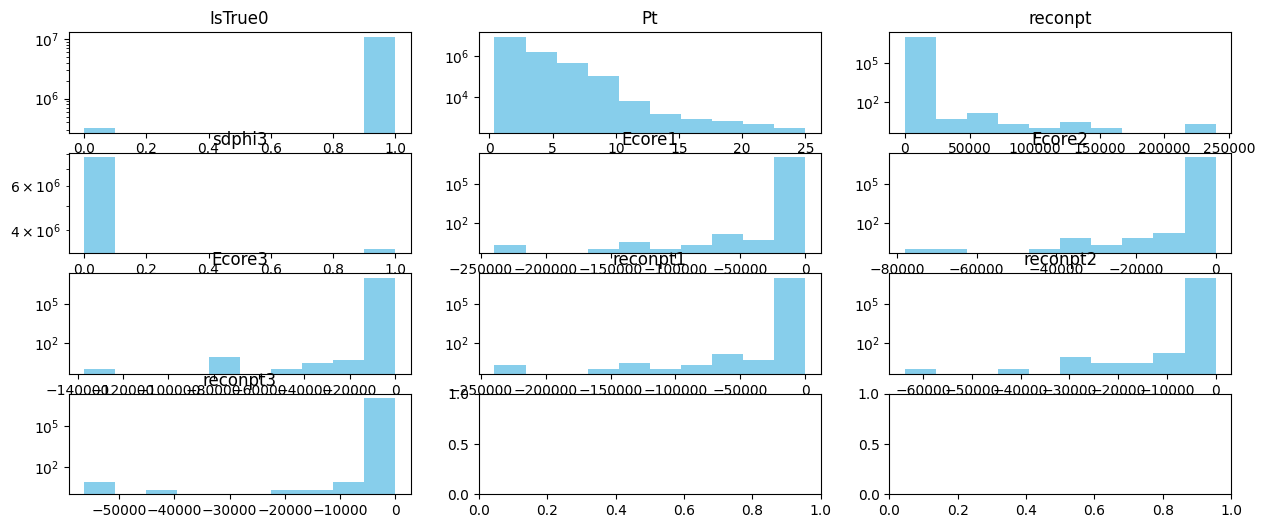

In [9]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)

    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [11]:
X_train_all, X_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

3714201 7428404


In [12]:
X_test

,Pt,Centrality,reconpt,sdphi3,Ecore1,Ecore2,Ecore3,reconpt1,reconpt2,reconpt3
363093,1.499504,70,1.501897,0.0,-0.779912,-1.080234,-1.496200,-0.002393,-0.001596,-0.001064
363094,0.543368,57,0.591650,0.0,-0.112458,-0.234681,-0.489743,-0.048283,-0.088859,-0.163533
363095,0.543368,57,0.591650,1.0,-0.112458,-0.234681,-0.489743,-0.048283,-0.088859,-0.163533
363096,0.682486,62,0.676560,0.0,-0.055664,-0.089651,-0.144390,0.005926,0.008684,0.012723
363101,0.678383,24,0.979134,0.0,-0.279477,-0.399448,-0.570919,-0.300750,-0.443334,-0.653516
...,...,...,...,...,...,...,...,...,...,...
6657756,0.744413,13,0.726245,1.0,0.040078,0.052299,0.068246,0.018168,0.024406,0.032786
6657757,0.662880,22,0.789172,0.0,-0.212979,-0.369631,-0.641505,-0.126292,-0.190520,-0.287412
6657764,0.452813,49,0.651934,0.0,-0.232891,-0.555767,-1.326274,-0.199121,-0.439743,-0.971137
6657765,0.594463,36,0.655892,0.0,-0.062756,-0.105803,-0.178379,-0.061429,-0.103336,-0.173830


In [13]:
X_train, X_val = X_train_all[:cut_off_val], X_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]
w_train, w_val = y_train-1, y_val-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_val = w_val*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.01      0.01    142267
           1       0.96      1.00      0.98   3571934

    accuracy                           0.96   3714201
   macro avg       0.87      0.50      0.50   3714201
weighted avg       0.95      0.96      0.94   3714201

confusion matrix
[[   1054  141213]
 [    303 3571631]]


In [15]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.01],
    "max_depth":[8],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[8]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.9621557907070727
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 8}
0.9745436501686365
time of execution (sec) 174.11582279205322


# Cross Validation

In [16]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.04      0.07    142267
           1       0.96      1.00      0.98   3571934

    accuracy                           0.96   3714201
   macro avg       0.78      0.52      0.52   3714201
weighted avg       0.95      0.96      0.95   3714201



In [17]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.25826230241072606
roc auc: 0.8275713828553473
f1 score: 0.8283567779147798


Text(0.5, 1.0, 'ROC AUC Curve')

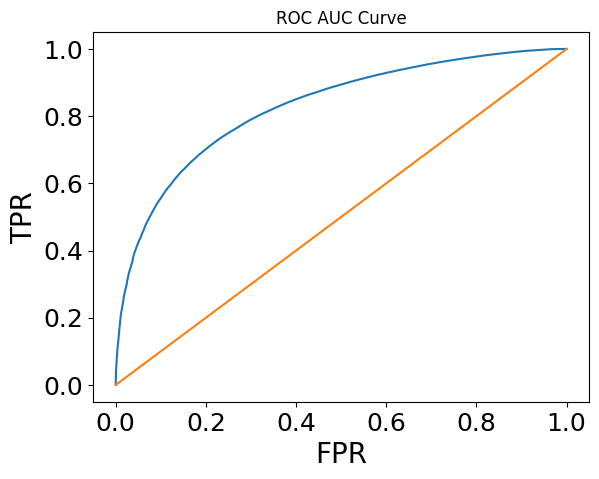

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [19]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.1625146737004176


In [101]:
i = 30000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

1.0 0.9827
0.37294629691278547 0.9824203785839302 0.9997525150240738


In [102]:
print(sum(predicted),len(predicted))

3705751 3714201


In [103]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.6714831330408806


In [104]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [105]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma = 3

counter =-1
centrality_prev, pt_prev, IsTrue0_prev = 0, 0, 0
centrality, pt, IsTrue0 = 0, 0, 0
prob, prob_prev = 0, 0
isTrue_sd, isTrue_sd_prev = 0, 0
puk_loc, puk_prev = 0, 0
for index, row in data0.iterrows():
    counter+=1
    if counter>400000: break
    sdphi0, sdphi1, sdphi2, sdphi3 = 0, 0, 0, 0
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']

    if ptloc<0.4 or centralityloc<0: continue

    if abs(ptloc -  pt_prev) < 1e-6: 
        cont = 0
        puk_prev = 1
        if proba_loc[counter][1] > prob_prev:
            prob_prev = proba_loc[counter][1]
            IsTrue0_prev = IsTrue0loc
        isTrue_sd_prev = IsTrue0loc
    else: 
        isTrue_sd = isTrue_sd_prev
        isTrue_sd_prev = IsTrue0loc
        pt = pt_prev
        pt_prev = ptloc
        centrality = centrality_prev
        centrality_prev = centralityloc
        prob = prob_prev
        prob_prev = proba_loc[counter][1]
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        cont = 1
        puk = puk_prev
        puk_prev = 0

    if not cont: continue

    if True: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if ( abs(sdphi0) < sigma and abs(sdthe0) < sigma and abs(sdphi1) < sigma and abs(sdthe1) < sigma ) and ( ( abs(sdphi2) < sigma and abs(sdthe2) < sigma ) or ( abs(sdphi3) < sigma and abs(sdthe3) < sigma ) ):
        if isTrue_sd: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)
    if prob>thresholds[i]: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [106]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

266487.1 10902.1 0.987 1.613 1.0 0.97 0.97 0.983


In [107]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

1.684 1.013 0.601 31


In [108]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [109]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(8)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(4)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(2)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(8)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(4)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(2)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    proj.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))
c1.SaveAs("output/kek.png")

0.0 1622.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file output/kek.png has been created


In [110]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [111]:
import pickle
with open('output/bdt_hit.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


In [112]:
import pickle
# load
with open('output/bdt_hit.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


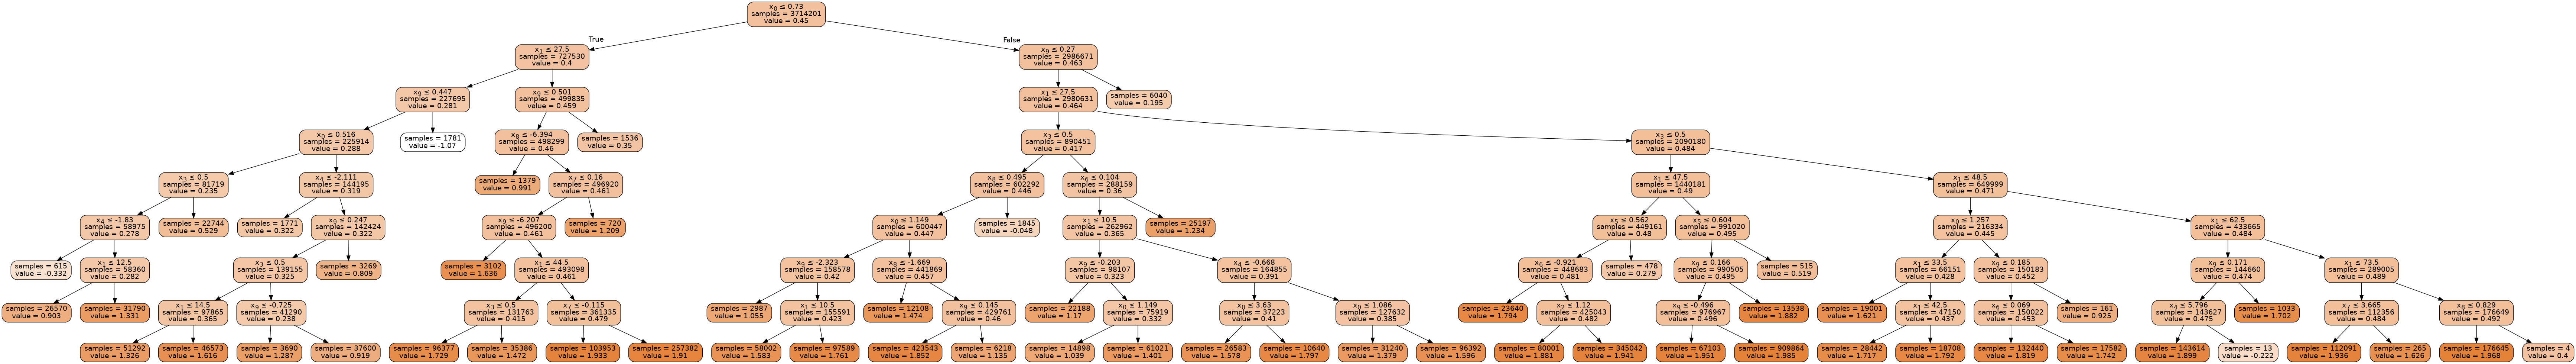

In [113]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [114]:
clf2.predict(kek_data[0:100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [115]:
clf2.predict_proba(kek_data[0:100])

array([[0.32851687, 0.67148313],
       [0.12224171, 0.87775829],
       [0.1358212 , 0.8641788 ],
       [0.11917105, 0.88082895],
       [0.13678675, 0.86321325],
       [0.11219057, 0.88780943],
       [0.12304832, 0.87695168],
       [0.12051212, 0.87948788],
       [0.10763742, 0.89236258],
       [0.13137188, 0.86862812],
       [0.10070815, 0.89929185],
       [0.10059863, 0.89940137],
       [0.10575935, 0.89424065],
       [0.10913044, 0.89086956],
       [0.10440143, 0.89559857],
       [0.11848427, 0.88151573],
       [0.25104275, 0.74895725],
       [0.32975831, 0.67024169],
       [0.25104275, 0.74895725],
       [0.20706269, 0.79293731],
       [0.20706269, 0.79293731],
       [0.12079755, 0.87920245],
       [0.20704859, 0.79295141],
       [0.20704859, 0.79295141],
       [0.11617035, 0.88382965],
       [0.15939059, 0.84060941],
       [0.11029079, 0.88970921],
       [0.12701472, 0.87298528],
       [0.10059863, 0.89940137],
       [0.10460821, 0.89539179],
       [0.

In [116]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 8}


In [117]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.13137188, 0.86862812],
       [0.10070815, 0.89929185],
       [0.10059863, 0.89940137],
       [0.10575935, 0.89424065],
       [0.10913044, 0.89086956],
       [0.10440143, 0.89559857],
       [0.11848427, 0.88151573],
       [0.25104275, 0.74895725],
       [0.32975831, 0.67024169],
       [0.25104275, 0.74895725],
       [0.20706269, 0.79293731]])

In [118]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,1):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[0.38659938 0.396904   0.396904   0.39365767 0.38821641 0.396904
 0.37977079 0.26514559 0.18378378 0.26514559]
[2.74883783 3.22669221 3.22669221 2.99461951 3.14656409 3.16335765
 2.93128495 1.87973795 1.69948088 1.87973795 2.32230203]
[0.5954638  0.59794359 0.59794359 0.5971629  0.59585326 0.59794359
 0.59381782 0.56590077 0.54581706 0.56590077]


In [119]:
best_gbc = clf2.best_estimator_

In [120]:
n_estim = best_gbc.n_estimators

In [121]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[1.88888304 2.18938084 2.19059078 2.13480867 2.09965413 2.1492489
 2.0068626  1.09305867 0.70927837 1.09305867]
[0.86862812 0.89929185 0.89940137 0.89424065 0.89086956 0.89559857
 0.88151573 0.74895725 0.67024169 0.74895725]
0.2


In [122]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [123]:
print(log_odds_predictions)

[[1.93299691885034, 1.9845200015795916, 1.9845200015795916, 1.96828833705483, 1.9410820421056265, 1.9845200015795916, 1.8988539253229566, 1.325727956010212, 0.918918918918919, 1.325727956010212], [1.447886669731771, 1.659749550081032, 1.659749550081032, 1.6407142384279771, 1.559836465172986, 1.6118777484304374, 1.6118777484304374, 1.0183275432177283, 0.5576395568655799, 1.0183275432177283], [1.2129761205300011, 1.4736375936144697, 1.4736375936144697, 1.4365877024220852, 1.3552036887307979, 1.4501989112567644, 1.4144029364003055, 0.5171993253565574, 0.5171993253565574, 0.5171993253565574], [1.2275260102924435, 1.294384000604745, 1.294384000604745, 1.2630306655838885, 1.294384000604745, 1.2024672838247707, 1.1229557011904945, 0.7848859051395927, 0.45296191065939073, 0.7848859051395927], [0.8142432798645909, 1.225345173353028, 1.225345173353028, 1.2398329711980551, 1.225345173353028, 1.225345173353028, 1.053738711165702, 0.6034865505955302, 0.15374409467172387, 0.6034865505955302], [1.115

In [124]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(n_estim)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 1.8888830368197302
[1.88888304 2.18938084 2.19059078 2.13480867 2.09965413 2.1492489
 2.0068626  1.09305867 0.70927837 1.09305867]


In [125]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

8
1
[[1.93299691885034, 1.447886669731771, 1.2129761205300011, 1.2275260102924435, 0.8142432798645909, 1.115847232945464, 1.110355836445872, 0.5825831154381675], [1.9845200015795916, 1.659749550081032, 1.4736375936144697, 1.294384000604745, 1.225345173353028, 1.2026602581949624, 1.0110576801887519, 1.0955499369151214], [1.9845200015795916, 1.659749550081032, 1.4736375936144697, 1.294384000604745, 1.225345173353028, 1.2026602581949624, 1.0110576801887519, 1.1015996275234485], [1.96828833705483, 1.6407142384279771, 1.4365877024220852, 1.2630306655838885, 1.2398329711980551, 1.115847232945464, 1.104299593519957, 0.9054425909838543], [1.9410820421056265, 1.559836465172986, 1.3552036887307979, 1.294384000604745, 1.225345173353028, 1.1256433654870555, 1.0110576801887519, 0.9857182261187941], [1.9845200015795916, 1.6118777484304374, 1.4501989112567644, 1.2024672838247707, 1.225345173353028, 1.165227753905987, 1.0110576801887519, 1.0955499369151214], [1.8988539253229566, 1.6118777484304374, 1.

In [126]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [127]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [128]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['Pt', 'Centrality', 'reconpt', 'sdphi3', 'Ecore1', 'Ecore2', 'Ecore3', 'reconpt1', 'reconpt2', 'reconpt3']
10


In [129]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[0] > 0.7299372851848602) if (x[9] <= 0.26994967460632324) if (x[1] > 27.5) if (x[3] <= 0.5) if (x[1] > 47.5) if (x[5] <= 0.6043956279754639) if (x[9] <= 0.16603448241949081) if (x[9] > -0.49565616250038147)   return 1.9845200015795916;  // | based on 909,864 samples
        if  (x[0] > 0.7299372851848602) if (x[9] <= 0.26994967460632324) if (x[1] <= 27.5) if (x[3] <= 0.5) if (x[8] <= 0.4951659142971039) if (x[0] > 1.1493459343910217) if (x[8] > -1.6692404747009277) if (x[9] <= 0.1447930857539177)   return 1.8517313534519313;  // | based on 423,543 samples
        if  (x[0] > 0.7299372851848602) if (x[9] <= 0.26994967460632324) if (x[1] > 27.5) if (x[3] <= 0.5) if (x[1] <= 47.5) if (x[5] <= 0.562041312456131) if (x[6] > -0.9206286370754242) if (x[2] > 1.1199935674667358)   return 1.9410820421056265;  // | based on 345,042 samples
        if  (x[0] <= 0.7299372851848602) if (x[1] > 27.5) if (x[9] <= 0.5014962255954742) if (x[8] > -6.39438319206

In [130]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [131]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[0] > 0.7299372851848602) and (x[9] <= 0.26994967460632324) and (x[1] > 27.5) and (x[3] <= 0.5) and (x[1] > 47.5) and (x[5] <= 0.6043956279754639) and (x[9] <= 0.16603448241949081) and (x[9] > -0.49565616250038147) :  return 1.9845200015795916  # | based on 909,864 samples
        if (x[0] > 0.7299372851848602) and (x[9] <= 0.26994967460632324) and (x[1] <= 27.5) and (x[3] <= 0.5) and (x[8] <= 0.4951659142971039) and (x[0] > 1.1493459343910217) and (x[8] > -1.6692404747009277) and (x[9] <= 0.1447930857539177) :  return 1.8517313534519313  # | based on 423,543 samples
        if (x[0] > 0.7299372851848602) and (x[9] <= 0.26994967460632324) and (x[1] > 27.5) and (x[3] <= 0.5) and (x[1] <= 47.5) and (x[5] <= 0.562041312456131) and (x[6] > -0.9206286370754242) and (x[2] > 1.1199935674667358) :  return 1.9410820421056265  # | based on 345,042 samples
        if (x[0] <= 0.7299372851848602) and (x[1] > 27.5) and (x[9] <= 0.501496225

In [132]:
def mytree(x,y):
    return 0

In [133]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [134]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [135]:
iestim = 0
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:19].values.tolist())
print(y)

myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(n_estim)]
print(myf)

[1.93299692 1.98452    1.98452    1.96828834 1.94108204 1.98452
 1.89885393 1.32572796 0.91891892 1.32572796]
[0, 0, 0, 0, 0, 0, 0, 0]


In [136]:
input_x = [ kek_data[9:19].values.tolist()[0][i] for i in range(len(kek_data[9:19].values.tolist()[0])) ]
print(input_x)

[0.43579328060150146, 75.0, 0.5844237804412842, 1.0, -0.18703605256881906, -0.4706638868043885, -1.1843946196432118, -0.14863049983978271, -0.34105736017227173, -0.782612681388855]


In [137]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.8686281226716683, 0.8992918453400617, 0.8994013716953413, 0.8942406475529321, 0.8908695573663339, 0.8955985683670156, 0.8815157263983804, 0.7489572517139612, 0.6702416867653584, 0.7489572517139612]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [138]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [139]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['Pt', 'Centrality', 'reconpt', 'sdphi3', 'Ecore1', 'Ecore2', 'Ecore3', 'reconpt1', 'reconpt2', 'reconpt3']
10
